In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.datasets import imdb

In [ ]:
start_char = 1
oov_char = 2
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = None, start_char=start_char, oov_char=oov_char, index_from=index_from)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word2id = imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word2id.items()
)
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
print(len(inverted_word_index)) # total number of words

print('---review with words---')
print([inverted_word_index.get(i, ' ') for i in X_train[0]])
print(' '.join([inverted_word_index.get(i, ' ') for i in X_train[0]]))
print('---label---')
print(y_train[0])

88586
---review with words---
['[START]', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', "redford's", 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', "norman's", 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', 'retail', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what',

## List of Trained Model Filenames

In [ ]:
transformers_task_1 = ['keras-transformer-32-200-1-100-5000-10-10000', 'keras-transformer-32-200-1-500-5000-10-10000', 'keras-transformer-32-200-1-1000-5000-10-10000']
transformers_task_2 = ['keras-transformer-32-200-1-500-5000-10-10000', 'keras-transformer-32-200-1-500-25000-10-10000']

In [ ]:
rnns_task_1 = ['rnn-32-200-1-100-5000-10-10000', 'rnn-32-200-1-500-5000-10-10000', 'rnn-32-200-1-1000-5000-10-10000']
rnns_task_2 = ['rnn-32-200-1-500-5000-10-10000', 'rnn-32-200-1-500-25000-10-10000']

In [ ]:
colors=['b','g','m'] # colors for plotting

## Transformers Task 1: Varying Max Length

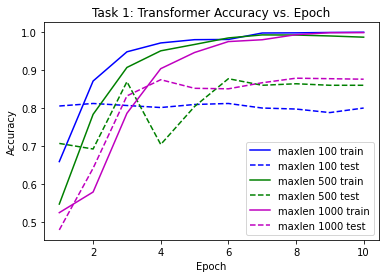

In [ ]:
# accuracy per epoch

plt.figure()
for i in range(len(transformers_task_1)):
  LOGDIR = "/content/drive/MyDrive/models/" + transformers_task_1[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['accuracy'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_accuracy'], colors[i]+'--')

  plt.title(f'Task 1: Transformer Accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

plt.legend(['maxlen 100 train', 'maxlen 100 test','maxlen 500 train', 'maxlen 500 test','maxlen 1000 train', 'maxlen 1000 test'])
plt.savefig(f'/content/drive/MyDrive/models/transformer_maxlen_acc_vs_epoch.png')
plt.show()

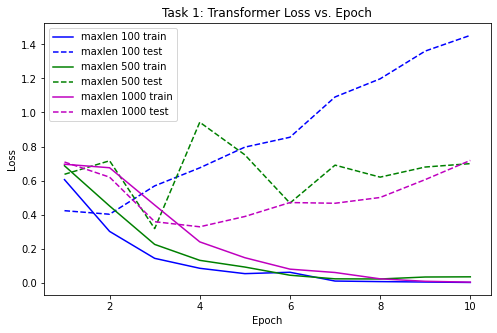

In [ ]:
# loss per epoch

plt.figure(figsize=(8, 5))
for i in range(len(transformers_task_1)):
  LOGDIR = "/content/drive/MyDrive/models/" + transformers_task_1[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['loss'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_loss'], colors[i]+'--')

  plt.title(f'Task 1: Transformer Loss vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(['maxlen 100 train', 'maxlen 100 test','maxlen 500 train', 'maxlen 500 test','maxlen 1000 train', 'maxlen 1000 test'])
plt.savefig(f'/content/drive/MyDrive/models/transformer_maxlen_loss_vs_epoch.png')
plt.show()

## RNNs Task 1: Varying Max Length

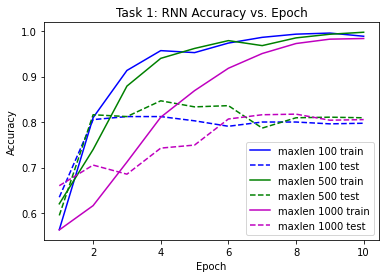

In [ ]:
# accuracy per epoch

plt.figure()
for i in range(len(rnns_task_1)):
  LOGDIR = "/content/drive/MyDrive/models/" + rnns_task_1[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['accuracy'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_accuracy'], colors[i]+'--')

  plt.title(f'Task 1: RNN Accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

plt.legend(['maxlen 100 train', 'maxlen 100 test','maxlen 500 train', 'maxlen 500 test','maxlen 1000 train', 'maxlen 1000 test'])
plt.savefig(f'/content/drive/MyDrive/models/rnn_maxlen_acc_vs_epoch.png')
plt.show()

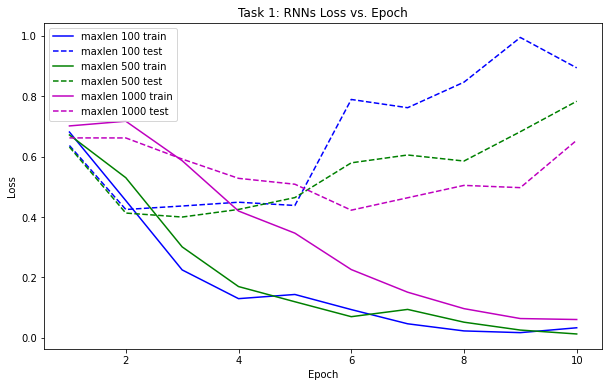

In [ ]:
# loss per epoch

plt.figure(figsize=(10, 6))
for i in range(len(rnns_task_1)):
  LOGDIR = "/content/drive/MyDrive/models/" + rnns_task_1[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['loss'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_loss'], colors[i]+'--')

  plt.title(f'Task 1: RNNs Loss vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(['maxlen 100 train', 'maxlen 100 test','maxlen 500 train', 'maxlen 500 test','maxlen 1000 train', 'maxlen 1000 test'])
plt.savefig(f'/content/drive/MyDrive/models/rnn_maxlen_loss_vs_epoch.png')
plt.show()

## Transformers Task 2: Varying Number of Samples

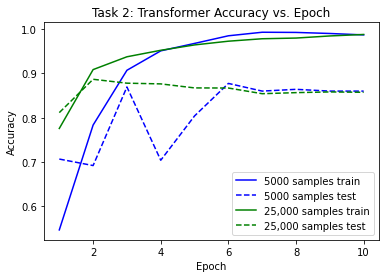

In [ ]:
# accuracy per epoch

plt.figure()
for i in range(len(transformers_task_2)):
  LOGDIR = "/content/drive/MyDrive/models/" + transformers_task_2[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['accuracy'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_accuracy'], colors[i]+'--')

  plt.title(f'Task 2: Transformer Accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

plt.legend(['5000 samples train', '5000 samples test','25,000 samples train', '25,000 samples test'])
plt.savefig(f'/content/drive/MyDrive/models/transformer_samples_acc_vs_epoch.png')
plt.show()

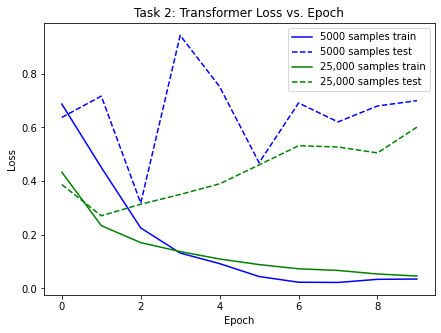

In [ ]:
# loss per epoch

plt.figure(figsize=(7, 5))
for i in range(len(transformers_task_2)):
  LOGDIR = "/content/drive/MyDrive/models/" + transformers_task_2[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch'],logs_df['loss'], colors[i]+'-')
  plt.plot(logs_df['epoch'],logs_df['val_loss'], colors[i]+'--')

  plt.title(f'Task 2: Transformer Loss vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(['5000 samples train', '5000 samples test','25,000 samples train', '25,000 samples test'])
plt.savefig(f'/content/drive/MyDrive/models/transformer_samples_loss_vs_epoch.png')
plt.show()

## RNNs Task 2: Varying Num Samples

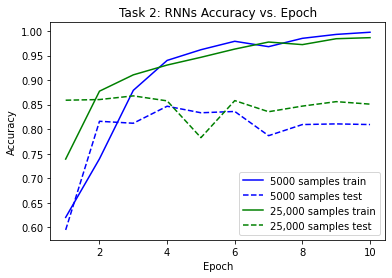

In [ ]:
# accuracy per epoch

plt.figure()
for i in range(len(rnns_task_2)):
  LOGDIR = "/content/drive/MyDrive/models/" + rnns_task_2[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch']+1,logs_df['accuracy'], colors[i]+'-')
  plt.plot(logs_df['epoch']+1,logs_df['val_accuracy'], colors[i]+'--')

  plt.title(f'Task 2: RNNs Accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')

plt.legend(['5000 samples train', '5000 samples test','25,000 samples train', '25,000 samples test'])
plt.savefig(f'/content/drive/MyDrive/models/rnn_samples_acc_vs_epoch.png')
plt.show()

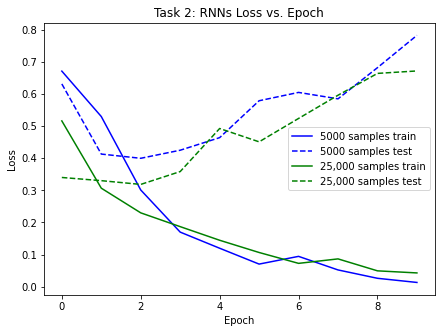

In [ ]:
# loss per epoch

plt.figure(figsize=(7,5))
for i in range(len(rnns_task_2)):
  LOGDIR = "/content/drive/MyDrive/models/" + rnns_task_2[i]
  train_loss_csv = LOGDIR + '/train_losses_per_batch.csv'
  test_loss_csv = LOGDIR + '/test_losses_per_batch.csv'
  train_acc_csv = LOGDIR + '/train_accuracy_per_batch.csv'
  test_acc_csv = LOGDIR + '/test_accuracy_per_batch.csv'
  time_csv = LOGDIR + '/time_per_batch.csv'
  logs_csv = LOGDIR + '/logs/logs.csv'

  logs_df = pd.read_csv(logs_csv)

  plt.plot(logs_df['epoch'],logs_df['loss'], colors[i]+'-')
  plt.plot(logs_df['epoch'],logs_df['val_loss'], colors[i]+'--')

  plt.title(f'Task 2: RNNs Loss vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(['5000 samples train', '5000 samples test','25,000 samples train', '25,000 samples test'])
plt.savefig(f'/content/drive/MyDrive/models/rnn_samples_loss_vs_epoch.png')
plt.show()

## Plotting for Each Model

In [ ]:
# set these params
rnn_file = "rnn-32-200-1-1000-5000-15"
transformer_file = "keras-transformer-32-200-1-500-25000-10-10000"

In [ ]:
# directories
RNN_LOGDIR = "/content/drive/MyDrive/models/" + rnn_file
TRANSFORMER_LOGDIR = "/content/drive/MyDrive/models/" + transformer_file

In [ ]:
# get rnn csv files
rnn_train_loss_csv = RNN_LOGDIR + '/train_losses_per_batch.csv'
rnn_test_loss_csv = RNN_LOGDIR + '/test_losses_per_batch.csv'
rnn_train_acc_csv = RNN_LOGDIR + '/train_accuracy_per_batch.csv'
rnn_test_acc_csv = RNN_LOGDIR + '/test_accuracy_per_batch.csv'
rnn_time_csv = RNN_LOGDIR + '/time_per_batch.csv'

In [ ]:
# get transformer csv files
transformer_train_loss_csv = TRANSFORMER_LOGDIR + '/train_losses_per_batch.csv'
transformer_test_loss_csv = TRANSFORMER_LOGDIR + '/test_losses_per_batch.csv'
transformer_train_acc_csv = TRANSFORMER_LOGDIR + '/train_accuracy_per_batch.csv'
transformer_test_acc_csv = TRANSFORMER_LOGDIR + '/test_accuracy_per_batch.csv'
transformer_time_csv = TRANSFORMER_LOGDIR + '/time_per_batch.csv'

In [ ]:
# get logs which has accuracies and losses per epoch
rnn_logs_csv = RNN_LOGDIR + '/logs/logs.csv'
transformer_logs_csv = TRANSFORMER_LOGDIR + '/logs/logs.csv'

In [ ]:
csv_files = {
    'RNN': {
      'train_loss': rnn_train_loss_csv,
      'test_loss': rnn_test_loss_csv,
      'train_acc': rnn_train_acc_csv,
      'test_acc': rnn_test_acc_csv,
      'time': rnn_time_csv,
      'dir': RNN_LOGDIR,
      'logs': rnn_logs_csv
    },
    'Transformer': {
      'train_loss': transformer_train_loss_csv,
      'test_loss': transformer_test_loss_csv,
      'train_acc': transformer_train_acc_csv,
      'test_acc': transformer_test_acc_csv,
      'time': transformer_time_csv,
      'dir': TRANSFORMER_LOGDIR,
      'logs': transformer_logs_csv
    }
}

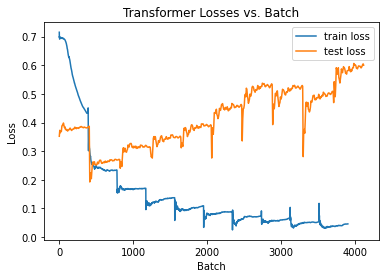

In [ ]:
# losses per batch
for key, item in csv_files.items():
  plt.figure()
  dir = item['dir']

  train_df = pd.read_csv(item['train_loss'])
  test_df = pd.read_csv(item['test_loss'])

  train_len = len(train_df)
  test_len = len(test_df)

  plt.plot(train_df.index,train_df['Training Loss'])
  plt.plot(test_df.index * round(train_len / test_len), test_df['Test Loss'], label='test loss')

  plt.title(f'{key} Losses vs. Batch')
  plt.ylabel('Loss')
  plt.xlabel('Batch')
  plt.legend(['train loss', 'test loss'])
  plt.savefig(f'{dir}/loss_vs_batch.png')
  plt.show()

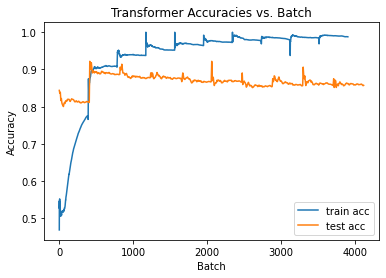

In [ ]:
# accuracies per batch
for key, item in csv_files.items():
  plt.figure()
  dir = item['dir']

  train_df = pd.read_csv(item['train_acc'])
  test_df = pd.read_csv(item['test_acc'])

  train_len = len(train_df)
  test_len = len(test_df)

  plt.plot(train_df.index,train_df['Train Accuracy'])
  plt.plot(test_df.index * round(train_len / test_len), test_df['Test Accuracy'])

  plt.title(f'{key} Accuracies vs. Batch')
  plt.ylabel('Accuracy')
  plt.xlabel('Batch')
  plt.legend(['train acc', 'test acc'])
  plt.savefig(f'{dir}/acc_vs_batch.png')
  plt.show()

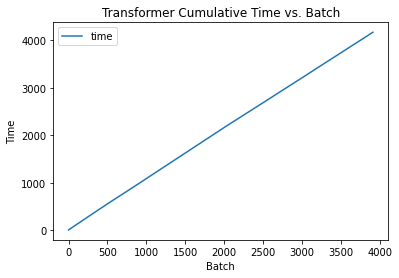

In [ ]:
# cumulative time vs. batch
for key, item in csv_files.items():
  plt.figure()
  dir = item['dir']

  time_df = pd.read_csv(item['time'])

  plt.plot(time_df['Time'].cumsum(), label='time')
  # plt.plot(test_df.index * round(train_len / test_len), time_df['Test Loss'], label='test loss')

  plt.title(f'{key} Cumulative Time vs. Batch')
  plt.ylabel('Time')
  plt.xlabel('Batch')
  plt.legend(['time'])
  plt.savefig(f'{dir}/cumul_time_vs_batch.png')
  plt.show()

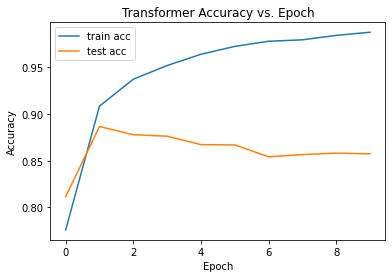

In [ ]:
# accuracy vs. epoch
for key, item in csv_files.items():
  plt.figure()
  dir = item['dir']

  log_df = pd.read_csv(item['logs'])

  plt.plot(log_df['epoch'], log_df['accuracy'])
  plt.plot(log_df['epoch'], log_df['val_accuracy'])

  plt.title(f'{key} Accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train acc', 'test acc'])
  plt.savefig(f'{dir}/acc_vs_epoch.png')
  plt.show()

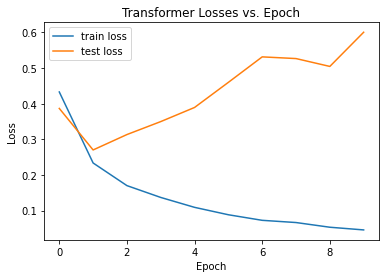

In [ ]:
# losses vs. epoch
for key, item in csv_files.items():
  plt.figure()
  dir = item['dir']

  log_df = pd.read_csv(item['logs'])

  plt.plot(log_df['epoch'], log_df['loss'])
  plt.plot(log_df['epoch'], log_df['val_loss'])

  plt.title(f'{key} Losses vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train loss', 'test loss'])
  plt.savefig(f'{dir}/losses_vs_epoch.png')
  plt.show()